# A simple example using Brian2 for simulating Spiking Neural Networks

For this experiment in neuromorphic computing, I'm using a short snippet from the [documentation of Brian2](https://brian2.readthedocs.io/en/2.5.0.3/resources/tutorials/1-intro-to-brian-neurons.html), which provides a simulator for spiking neural networks. Simulators are key for being able to train spiking neural networks and for designing and testing new algorithms in the neuromorphic computing space!

In this experiment, we create a simple neuronal model. Eventually, these types of fundamentals can be added upon to include other elements (including additional connectivity conditions between neurons, more parameters for simulations, etc.)

In [1]:
!pip install brian2

In [2]:
from brian2 import *

## Step 1: Determine your neural model and any parameters

Here, we're defining the differential equation will use as well as a few key parameters. We're using a simple neuronal model here that only consists of a single neuron (does not have multiple neurons).

In [3]:
#Define a differential equation for the neuron model
#tau is necessary for ensuring the unit is consistent
#across the equation
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

Let's create the neuronal model using NeuronGroup and define key parameters.

In [4]:
#Use the definition to create a neuron
#For creating the NeuronGroup (for our single neuron):
#We specify the equation, as well as threshold (when the spike should happen)
#The reset parameter resets the variable v after the spike to 0.
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

## Step 2: Monitor the values of the neuron

As part of this step, we instantiate a StateMonitor that can record the values of the neuron when the simulation runs, as well as a SpikeMonitor recording the spikes.

In [5]:
#The StateMonitor records the value of the neuron while the sim is running
#Here, we record all values for neuron 0
statemon = StateMonitor(G, 'v', record=0)
#A SpikeMonitor records the spikes
spikemon = SpikeMonitor(G)

We then run the simulation for 50ms and plot the results.

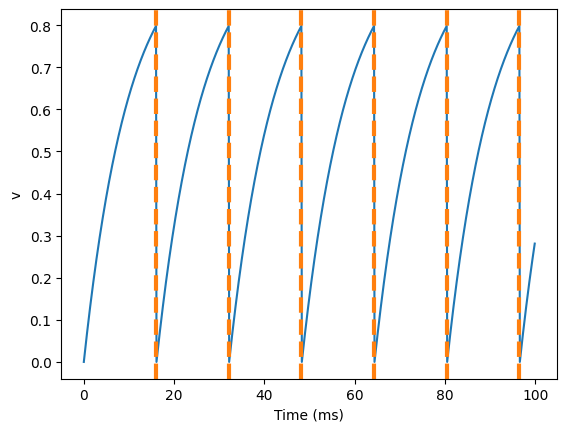

In [7]:
#Run the simulation for 50 miliseconds
run(50*ms)

#Plotting the v variable from the differential equation
plot(statemon.t/ms, statemon.v[0])
#Plotting orange spikes
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

Per the documentation, we now have a plot where:

- The blue line represents how the variable `v`, in our neuronal model's differential equation, evolves over time.
- The orange dashed vertical line represents the time a spike was recorded by the SpikeMonitor.

This is where our experiment ends! Adding additional neurons, connectivity, etc. are key next steps for more advanced SNN models.